# A pymc3 implementation of "Stan goes to the World Cup"

A simple reimplementation of the blog posts using `pymc3`

- https://andrewgelman.com/2014/07/13/stan-analyzes-world-cup-data/
- https://andrewgelman.com/2014/07/15/stan-world-cup-update/

In [1]:
import collections
import numpy as np
prior_scores = collections.OrderedDict()
with open('soccerpowerindex.txt') as f:
    n_teams = f.read().count('\n')
mean_prior_score = np.mean(np.arange(n_teams))
sd_prior_score = np.mean(np.arange(n_teams))
with open('soccerpowerindex.txt') as f:
    for i, L in enumerate(f):
        team = L.strip()
        prior_scores[team] = -1*(i - mean_prior_score) / sd_prior_score
prior_scores

OrderedDict([('Bresil', 1.0),
             ('Argentine', 0.9333333333333333),
             ('Allemagne', 0.8666666666666667),
             ('Espagne', 0.8),
             ('Chili', 0.7333333333333333),
             ('France', 0.6666666666666666),
             ('Colombie', 0.6),
             ('Uruguay', 0.5333333333333333),
             ('Angleterre', 0.4666666666666667),
             ('Belgique', 0.4),
             ('Pays-Bas', 0.3333333333333333),
             ('Bosnie', 0.26666666666666666),
             ('Equateur', 0.2),
             ('Portugal', 0.13333333333333333),
             ("Coted'Ivoire", 0.06666666666666667),
             ('Russie', -0.0),
             ('Italie', -0.06666666666666667),
             ('Suisse', -0.13333333333333333),
             ('Etats-Unis', -0.2),
             ('Mexique', -0.26666666666666666),
             ('Ghana', -0.3333333333333333),
             ('Grece', -0.4),
             ('Croatie', -0.4666666666666667),
             ('Nigeria', -0.533333333333

In [2]:
team_ids = {team: i for i, team in enumerate(prior_scores)}
team_ids

{'Algerie': 30,
 'Allemagne': 2,
 'Angleterre': 8,
 'Argentine': 1,
 'Australie': 31,
 'Belgique': 9,
 'Bosnie': 11,
 'Bresil': 0,
 'Cameroun': 27,
 'Chili': 4,
 'Colombie': 6,
 'Coree': 24,
 'CostaRica': 25,
 "Coted'Ivoire": 14,
 'Croatie': 22,
 'Equateur': 12,
 'Espagne': 3,
 'Etats-Unis': 18,
 'France': 5,
 'Ghana': 20,
 'Grece': 21,
 'Honduras': 29,
 'Iran': 28,
 'Italie': 16,
 'Japon': 26,
 'Mexique': 19,
 'Nigeria': 23,
 'Pays-Bas': 10,
 'Portugal': 13,
 'Russie': 15,
 'Suisse': 17,
 'Uruguay': 7}

In [3]:
import numpy as np
import pandas as pd

games = []
id_ = 0
with open('worldcup2012.txt') as f:
    for game_id, line in enumerate(f):
        team1, score1, team2, score2 = line.strip().split()
        score1, score2 = int(score1), int(score2)
        games.append({
            'game_id': game_id,
            'team1': team1,
            'team1_id': team_ids[team1],
            'score1': score1,
            'team2': team2,
            'team2_id': team_ids[team2],
            'score2': score2,
            'diff': np.sign(score1 - score2) * np.sqrt(np.abs(score1 - score2))
        })
n_teams = len(team_ids)
df = pd.DataFrame(games)
df

,diff,game_id,score1,score2,team1,team1_id,team2,team2_id
0,1.414214,0,3,1,Bresil,0,Croatie,22
1,1.000000,1,1,0,Mexique,19,Cameroun,27
2,0.000000,2,0,0,Bresil,0,Mexique,19
3,-2.000000,3,0,4,Cameroun,27,Croatie,22
4,-1.732051,4,1,4,Cameroun,27,Bresil,0
5,-1.414214,5,1,3,Croatie,22,Mexique,19
6,-2.000000,6,1,5,Espagne,3,Pays-Bas,10
7,1.414214,7,3,1,Chili,4,Australie,31
8,-1.414214,8,0,2,Espagne,3,Chili,4
9,-1.000000,9,2,3,Australie,31,Pays-Bas,10


In [4]:
import theano.tensor as T
import pymc3 as pm

n_games = len(df)
n_teams = len(prior_scores)

prior_scores_arr = np.array(list(prior_scores.values()))

game_team1 = df.team1_id
game_team2 = df.team2_id

score_diffs = df['diff']

def score_diff(s1, s2):
    d = s1 - s2
    return T.sgn(d) * T.sqrt(T.abs_(d))

with pm.Model() as model:
    b = pm.Normal('b', 0, 1)
    sigma_a = pm.HalfNormal('sigma_a', 1)
    abilities = pm.Normal('abilities', b*prior_scores_arr, sigma_a, shape=n_teams)
    
    sigma_y = pm.HalfNormal('sigma_y', 1)
    y_mu = pm.Deterministic('y_mu', score_diff(abilities[game_team1], abilities[game_team2]))
    y = pm.Normal('y', y_mu, sigma_y, shape=n_games, observed=score_diffs)
    
    trace = pm.sample(1_000, model=model)

/Users/dgates/venvs/py3/lib/python3.6/site-packages/theano/tensor/subtensor.py:2190: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/dgates/venvs/py3/lib/python3.6/site-packages/theano/tensor/subtensor.py:2190: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma_y, abilities, sigma_a, b]
/Users/dgates/venvs/py3/lib/python3.6/site

/Users/dgates/venvs/py3/lib/python3.6/site-packages/theano/tensor/subtensor.py:2190: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  rval = inputs[0].__getitem__(inputs[1:])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110cb19b0>,
      dtype=object)

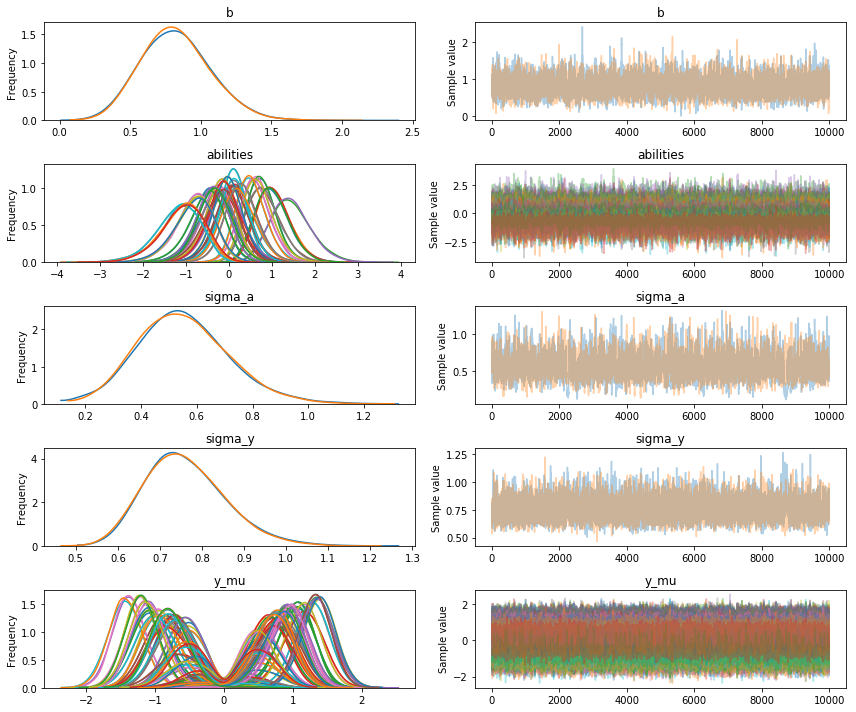

In [5]:
pm.plots.traceplot(trace)

In [6]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
b,0.825242,0.243339,0.003936,0.357974,1.292567,3180.985878,0.999954
abilities__0,0.746909,0.345835,0.004257,0.079450,1.448241,6051.672079,0.999966
abilities__1,1.044033,0.389135,0.005265,0.317410,1.822440,4557.188902,1.000152
abilities__2,1.441973,0.464696,0.008255,0.554811,2.351125,2534.816228,1.000031
abilities__3,0.089252,0.394632,0.003558,-0.715811,0.860890,10328.563884,0.999951
abilities__4,0.608552,0.360165,0.004454,-0.074829,1.333698,7169.268629,0.999968
abilities__5,0.805396,0.392646,0.005169,0.077450,1.596559,4651.417902,1.000049
abilities__6,0.699307,0.356232,0.004420,0.064634,1.450308,6470.084429,0.999955
abilities__7,0.096587,0.322021,0.003044,-0.559501,0.719642,9843.176410,0.999955
abilities__8,-0.326760,0.429830,0.005496,-1.191162,0.490407,6081.714315,1.000031


In [7]:
abilities_map = trace['abilities'].mean(axis=0)
abilities_sd_map = trace['abilities'].std(axis=0)
team_labels = list(team_ids)

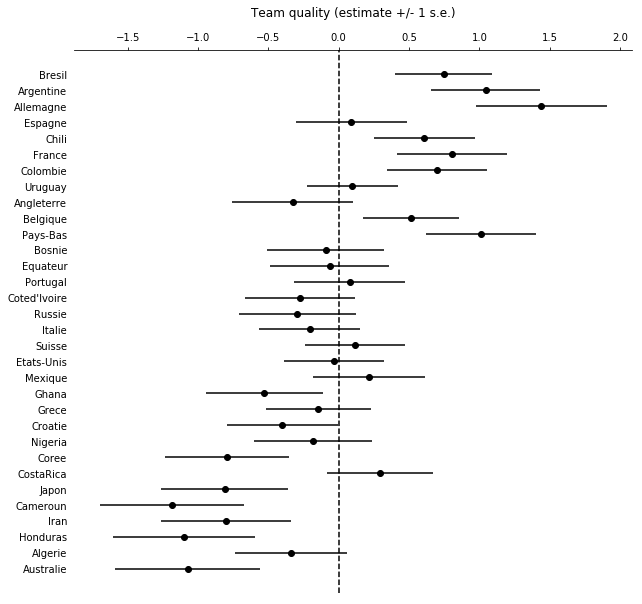

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

values = list(reversed(abilities_map))
labels = list(reversed(team_labels))
errors = list(reversed(abilities_sd_map))

fig, ax = plt.subplots(figsize=(10, 10))

# remove borders
sns.despine(left=True, bottom=True, top=False)

# plot error bars
ax.errorbar(values, range(len(labels)), xerr=errors, fmt='o', color='k')

# label the y-adxis
plt.yticks(np.arange(len(labels)))
locs, _ = plt.yticks()
plt.yticks(locs, labels)
plt.tick_params(axis='y', which='both', left=False)

# give it a reference line
ax.axvline(0, linestyle='--', color='k')

# Move x axis to top
ax.xaxis.tick_top()

# polish it off with a title
_ = ax.set_title('Team quality (estimate +/- 1 s.e.)', y=1.05)

# Game estimates

In [17]:
N = 10_000

def simulate_game_outcome(abilities1, abilities2):
    outcomes = np.random.choice(abilities1, size=N) - np.random.choice(abilities2, size=N)
    return np.mean(outcomes), np.sqrt(n_teams) * np.std(outcomes)
    
def game_score_estimate(rec):
    indices = np.array([rec.team1_id, rec.team2_id])
    abilities1, abilities2 = trace['abilities'][indices]
    return simulate_game_outcome(abilities1, abilities2)

estimates = df.apply(game_score_estimate, axis=1)
estimated_differential, estimated_error = zip(*estimates)
actual_score_differential = df.score1 - df.score2
labels = df.apply(lambda x: f'{x.team1} vs. {x.team2}', axis=1)

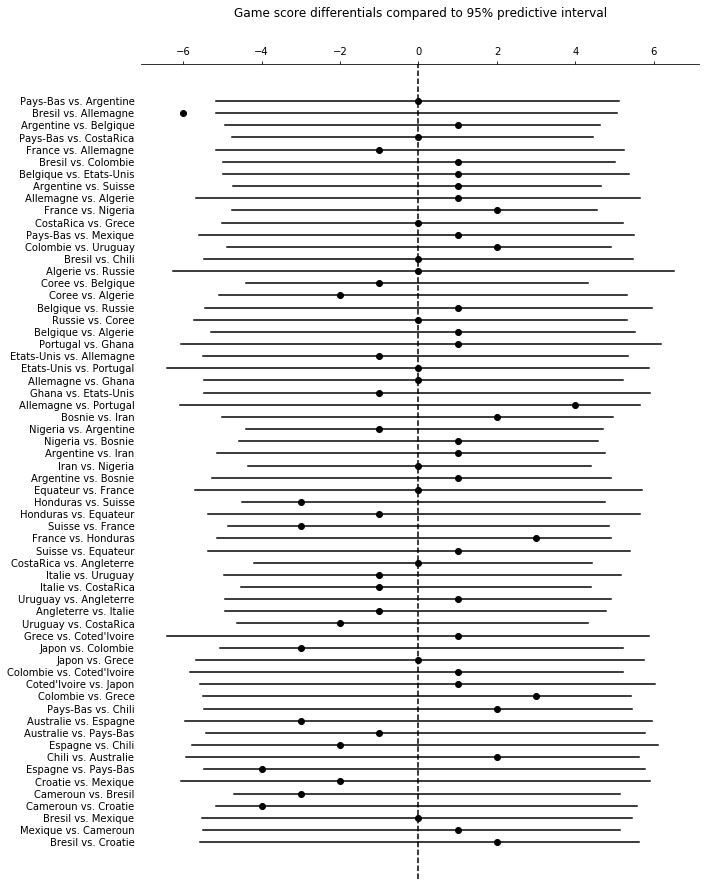

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 15))

# remove borders
sns.despine(left=True, bottom=True, top=False)

# plot actual outcome
ax.scatter(actual_score_differential, range(len(labels)), color='k')

# plot error bars
for idx, (differential, error) in enumerate(estimates):
    low, high = differential - error, differential + error
    ax.plot([low, high], [idx, idx], color='k')

# label the y-adxis
plt.yticks(np.arange(len(labels)))
locs, _ = plt.yticks()
plt.yticks(locs, labels)
plt.tick_params(axis='y', which='both', left=False)

# give it a reference line
ax.axvline(0, linestyle='--', color='k')

# Move x axis to top
ax.xaxis.tick_top()

# polish it off with a title
_ = ax.set_title('Game score differentials compared to 95% predictive interval', y=1.05)